In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import mydef

%load_ext autoreload
%autoreload 2

# Preprocessing Data

## Import Data & Convert CSV to Parquet

In [2]:
mydef.convert_file( 
    path_input=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari.csv',
    path_output=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet',
    format_target='parquet',
    save_index=False
)

mydef.convert_file(
    path_input= r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam.csv',
    path_output=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet',
    format_target='parquet',
    save_index=False
)

mydef.convert_file(
    path_input=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu.csv',
    path_output=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet',
    format_target='parquet',
    save_index=False
)

Membaca file CSV dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari.csv...
File CSV berhasil dibaca.
Menyimpan ke file Parquet di: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet...
File berhasil disimpan sebagai Parquet.

Membaca file CSV dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam.csv...
File CSV berhasil dibaca.
Menyimpan ke file Parquet di: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet...
File berhasil disimpan sebagai Parquet.

Membaca file CSV dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu.csv...
File CSV berhasil dibaca.
Menyimpan ke file Parquet di: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet...
File berhasil disimpan sebagai Parquet.



True

## Merapikan Data

### Menghapus Kolom yang tidak digunakan (data_1)

In [3]:
## Menghapus Kolom yang tidak diperlukan dari DataFrame
# Membuat variabel baru untuk proses selanjutnya (cleaning)
df_jam_1 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet')
df_hari_1 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet')

# Daaftar kolom yang akan dihapus
hapus_kolom_jam = ['id','tegangan', 'fasa1', 'fasa2', 'fasa3', 'A', 'A1', 'A2', 'A3', 'PF', 'F', 'quality']
hapus_kolom_hari = ['id','tegangan','fasa1','fasa2','fasa3','PF','F','totwbpday','totkwhday']

# Pemanggilan fungsi untuk menghapus kolom
removed_jam = mydef.remove_column(df_jam_1, hapus_kolom_jam) 
removed_hari = mydef.remove_column(df_hari_1, hapus_kolom_hari)

# Menyimpan DataFrame yang sudah dihapus kolomnya ke file Parquet dan csv
removed_jam.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_1.parquet', engine='pyarrow')
removed_hari.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_1.parquet', engine='pyarrow')
removed_jam.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_1.csv', index=False)
removed_hari.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_1.csv', index=False)


--- Memulai Proses Penghapusan Kolom untuk: DataFrame ---
Bentuk DataFrame SEBELUM penghapusan kolom: (1552848, 17)
Kolom yang akan dihapus: ['id', 'tegangan', 'fasa1', 'fasa2', 'fasa3', 'A', 'A1', 'A2', 'A3', 'PF', 'F', 'quality']
Kolom berhasil dihapus.
Bentuk DataFrame SETELAH penghapusan kolom: (1552848, 5)
Kolom yang tersisa (5 kolom): ['timestamp', 'fakultas', 'gedung', 'meter_id', 'power']
--- Proses Penghapusan Kolom untuk DataFrame Selesai dengan Sukses ---


--- Memulai Proses Penghapusan Kolom untuk: DataFrame ---
Bentuk DataFrame SEBELUM penghapusan kolom: (78488, 14)
Kolom yang akan dihapus: ['id', 'tegangan', 'fasa1', 'fasa2', 'fasa3', 'PF', 'F', 'totwbpday', 'totkwhday']
Kolom berhasil dihapus.
Bentuk DataFrame SETELAH penghapusan kolom: (78488, 5)
Kolom yang tersisa (5 kolom): ['timestamp', 'fakultas', 'gedung', 'meter_id', 'power']
--- Proses Penghapusan Kolom untuk DataFrame Selesai dengan Sukses ---



### Menghapus meter_id yang tidak digunakan (data_2)

In [4]:
## Menghapus meter_id yang tidak digunakan (data_2)

# 1. Membaca file Parquet
# Pastikan path file ini sudah benar sesuai dengan lokasi di komputer Anda
path_df_hari_input = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_1.parquet'
path_df_jam_input = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_1.parquet'

try:
    df_hari_2 = pd.read_parquet(path_df_hari_input)
    df_jam_2 = pd.read_parquet(path_df_jam_input)
except FileNotFoundError:
    print(f"Error: Salah satu atau kedua file input tidak ditemukan. Periksa path berikut:")
    print(f"- {path_df_hari_input}")
    print(f"- {path_df_jam_input}")
    exit()

# 2. Daftar meter_id yang ingin dihapus
meter_ids_to_remove = [
    # Jatinangor
    241001,242001,243001,243002,244002,244001,235001,236001,237001,238001,239001,240001,
    # BSC-B selain total
    114002,114003,114004,114005,
    # Labtek V SDP (selain MDP)
    105105,105104,105103,105102,105101,
    # Labtek VI selain total
    2,3,1,4,6,
    # Labtek VII selain total
    107104,107103,107102,107101,
    # Labtek VIII selain total
    108112,108111,108113,108114,108110,
    # CADL selain total
    122141,122131,122121,122111,
    # CRCS selain SDP
    112017,112031,112011,112012,112013,112014,112015,112016,
    112026,112027,112032,112033,112041,112121,
    # CAS selain SDP
    111026, 111040, 111033, 111032, 111031, 111030, 111041, 111025, 111024, 111023, 111022, 111021, 111016, 111042, 111043,
    111015, 111014, 111013, 111012, 111011,
    # Tidak ada di tabel meter_id
    103, 2026,
    # gardu CADL (asumsi pakai A dan B)
    148001

]
# Mengubah list menjadi set untuk operasi yang lebih efisien
meter_ids_to_remove_set = set(meter_ids_to_remove)

# --- MODIFIKASI KODE UNTUK MENGHITUNG JUMLAH METER ID YANG TERHAPUS SECARA TERPISAH ---
# Mendapatkan meter_id unik dari DataFrame asli SEBELUM proses penghapusan
original_meter_ids_in_df_hari = set(df_hari_2['meter_id'].unique())
original_meter_ids_in_df_jam = set(df_jam_2['meter_id'].unique())

# Meter ID yang ada di daftar penghapusan DAN juga ada di df_hari_2
ids_effectively_removed_from_hari = original_meter_ids_in_df_hari.intersection(meter_ids_to_remove_set)
jumlah_meter_id_unik_terhapus_dari_hari = len(ids_effectively_removed_from_hari)

# Meter ID yang ada di daftar penghapusan DAN juga ada di df_jam_2
ids_effectively_removed_from_jam = original_meter_ids_in_df_jam.intersection(meter_ids_to_remove_set)
jumlah_meter_id_unik_terhapus_dari_jam = len(ids_effectively_removed_from_jam)

print(f"Jumlah meter_id unik yang dihapus dari data harian: {jumlah_meter_id_unik_terhapus_dari_hari}")
print(f"Meter ID yang dihapus dari data harian: {sorted(list(ids_effectively_removed_from_hari)) if jumlah_meter_id_unik_terhapus_dari_hari > 0 else 'Tidak ada'}")

print(f"\nJumlah meter_id unik yang dihapus dari data per jam: {jumlah_meter_id_unik_terhapus_dari_jam}")
print(f"Meter ID yang dihapus dari data per jam: {sorted(list(ids_effectively_removed_from_jam)) if jumlah_meter_id_unik_terhapus_dari_jam > 0 else 'Tidak ada'}")


# Opsional: Informasi tambahan jika ada meter_id di daftar hapus yang tidak ditemukan di data
# Menggabungkan semua meter_id unik yang secara efektif dihapus (dari salah satu atau kedua DataFrame)
all_unique_meter_ids_actually_removed = ids_effectively_removed_from_hari.union(ids_effectively_removed_from_jam)
total_unique_meter_ids_removed_overall = len(all_unique_meter_ids_actually_removed)
print(f"\nTotal meter_id unik yang dihapus dari keseluruhan data (harian atau jam): {total_unique_meter_ids_removed_overall}")


meter_ids_in_list_not_found_in_data = meter_ids_to_remove_set - all_unique_meter_ids_actually_removed
if meter_ids_in_list_not_found_in_data:
    print(f"\nCatatan: {len(meter_ids_in_list_not_found_in_data)} meter_id dari daftar 'meter_ids_to_remove' tidak ditemukan di kedua DataFrame:")
    print(f"  {sorted(list(meter_ids_in_list_not_found_in_data))}")
# --- AKHIR MODIFIKASI KODE ---

# 3. Menghapus baris yang memiliki meter_id tersebut
# Variabel df_hari_2 dan df_jam_2 akan di-overwrite dengan DataFrame yang sudah difilter
df_hari_2 = df_hari_2[~df_hari_2['meter_id'].isin(meter_ids_to_remove)]
df_jam_2 = df_jam_2[~df_jam_2['meter_id'].isin(meter_ids_to_remove)]

# 4. Menyimpan hasilnya ke file baru
# Pastikan path file output ini sudah benar dan Anda memiliki izin untuk menulis ke folder tersebut
path_df_hari_output_parquet = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet'
path_df_jam_output_parquet = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet'
path_df_hari_output_csv = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_2.csv'
path_df_jam_output_csv = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_2.csv'

try:
    df_hari_2.to_parquet(path_df_hari_output_parquet)
    df_jam_2.to_parquet(path_df_jam_output_parquet)

    df_hari_2.to_csv(path_df_hari_output_csv, index=False)
    df_jam_2.to_csv(path_df_jam_output_csv, index=False)

    print(f"\nFile berhasil diproses dan disimpan.")
    print(f"Output Parquet Harian: {path_df_hari_output_parquet}")
    print(f"Output Parquet Jam: {path_df_jam_output_parquet}")
    print(f"Output CSV Harian: {path_df_hari_output_csv}")
    print(f"Output CSV Jam: {path_df_jam_output_csv}")
except Exception as e:
    print(f"\nTerjadi error saat menyimpan file: {e}")



Jumlah meter_id unik yang dihapus dari data harian: 76
Meter ID yang dihapus dari data harian: [1, 2, 3, 4, 6, 103, 2026, 105101, 105102, 105103, 105104, 105105, 107101, 107102, 107103, 107104, 108110, 108111, 108112, 108113, 108114, 111011, 111012, 111013, 111014, 111015, 111016, 111021, 111022, 111023, 111024, 111025, 111026, 111030, 111031, 111032, 111033, 111040, 111041, 111042, 111043, 112011, 112012, 112013, 112014, 112015, 112016, 112017, 112026, 112027, 112031, 112032, 112033, 112041, 112121, 114002, 114003, 114004, 114005, 122111, 122121, 122131, 122141, 148001, 235001, 236001, 237001, 238001, 239001, 240001, 241001, 242001, 243001, 243002, 244001, 244002]

Jumlah meter_id unik yang dihapus dari data per jam: 74
Meter ID yang dihapus dari data per jam: [1, 2, 3, 4, 6, 105101, 105102, 105103, 105104, 105105, 107101, 107102, 107103, 107104, 108110, 108111, 108112, 108113, 108114, 111011, 111012, 111013, 111014, 111015, 111016, 111021, 111022, 111023, 111024, 111025, 111026, 1110

In [5]:
# Menghitung jumlah nilai kosong (NaN) di kolom 'power'
df_hari_2 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet')
df_jam_2 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet')
jumlah_kosong_hari = df_hari_2['power'].isna().sum()
jumlah_kosong_jam = df_jam_2['power'].isna().sum()

print(f"Jumlah data kosong di kolom 'power' hari: {jumlah_kosong_hari}")
print(f"Jumlah data kosong di kolom 'power' jam: {jumlah_kosong_jam}")

print('dihasilkan: power yang kosong otomatis tidak ada karena tidak ter-record')

Jumlah data kosong di kolom 'power' hari: 0
Jumlah data kosong di kolom 'power' jam: 0
dihasilkan: power yang kosong otomatis tidak ada karena tidak ter-record


### Membuat pivot table (data_3)

In [6]:
# Pivot table data_hari
data_hari_to_pivot = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet')
data_hari_to_pivot['timestamp'] = pd.to_datetime(data_hari_to_pivot['timestamp'])
data_hari_3 = data_hari_to_pivot.pivot_table(index='timestamp', columns='meter_id', values='power', aggfunc='sum')

# Pivot table data_jam
data_jam_to_pivot = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet')
data_jam_to_pivot['timestamp'] = pd.to_datetime(data_jam_to_pivot['timestamp'])
data_jam_3 = data_jam_to_pivot.pivot_table(index='timestamp', columns='meter_id', values='power', aggfunc='sum')

# save file
data_hari_3.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')
data_hari_3.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_3.csv')
data_jam_3.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_3.parquet')
data_jam_3.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_3.csv')

### Membuat tabel dan visualisasi missing data dari meter_id


--- Memulai Analisis Missing Data untuk File: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet (Versi Disesuaikan) ---
File pivot berhasil dimuat sebagai Parquet.
File informasi meter berhasil dimuat dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet

Ringkasan Analisis Missing Data (beberapa baris teratas):
   meter_id  jumlah_missing    fakultas          gedung             lokasi           ip  modbus_slave  include  power_meter  persentase_missing
43   117112             846         SBM        SBM Lama              Total  10.18.65.30           112        1         2200           79.811321
9    101201             808       FMIPA        LABTEK I  Lab Kimia Organik   10.1.22.67           100        1         5350           76.226415
74   500002             770  UNIT KERJA     Villa Merah              Total   10.8.62.16             1        0         2200           72.641509
73   500001             764        PLTS     Villa Merah               PLTS  

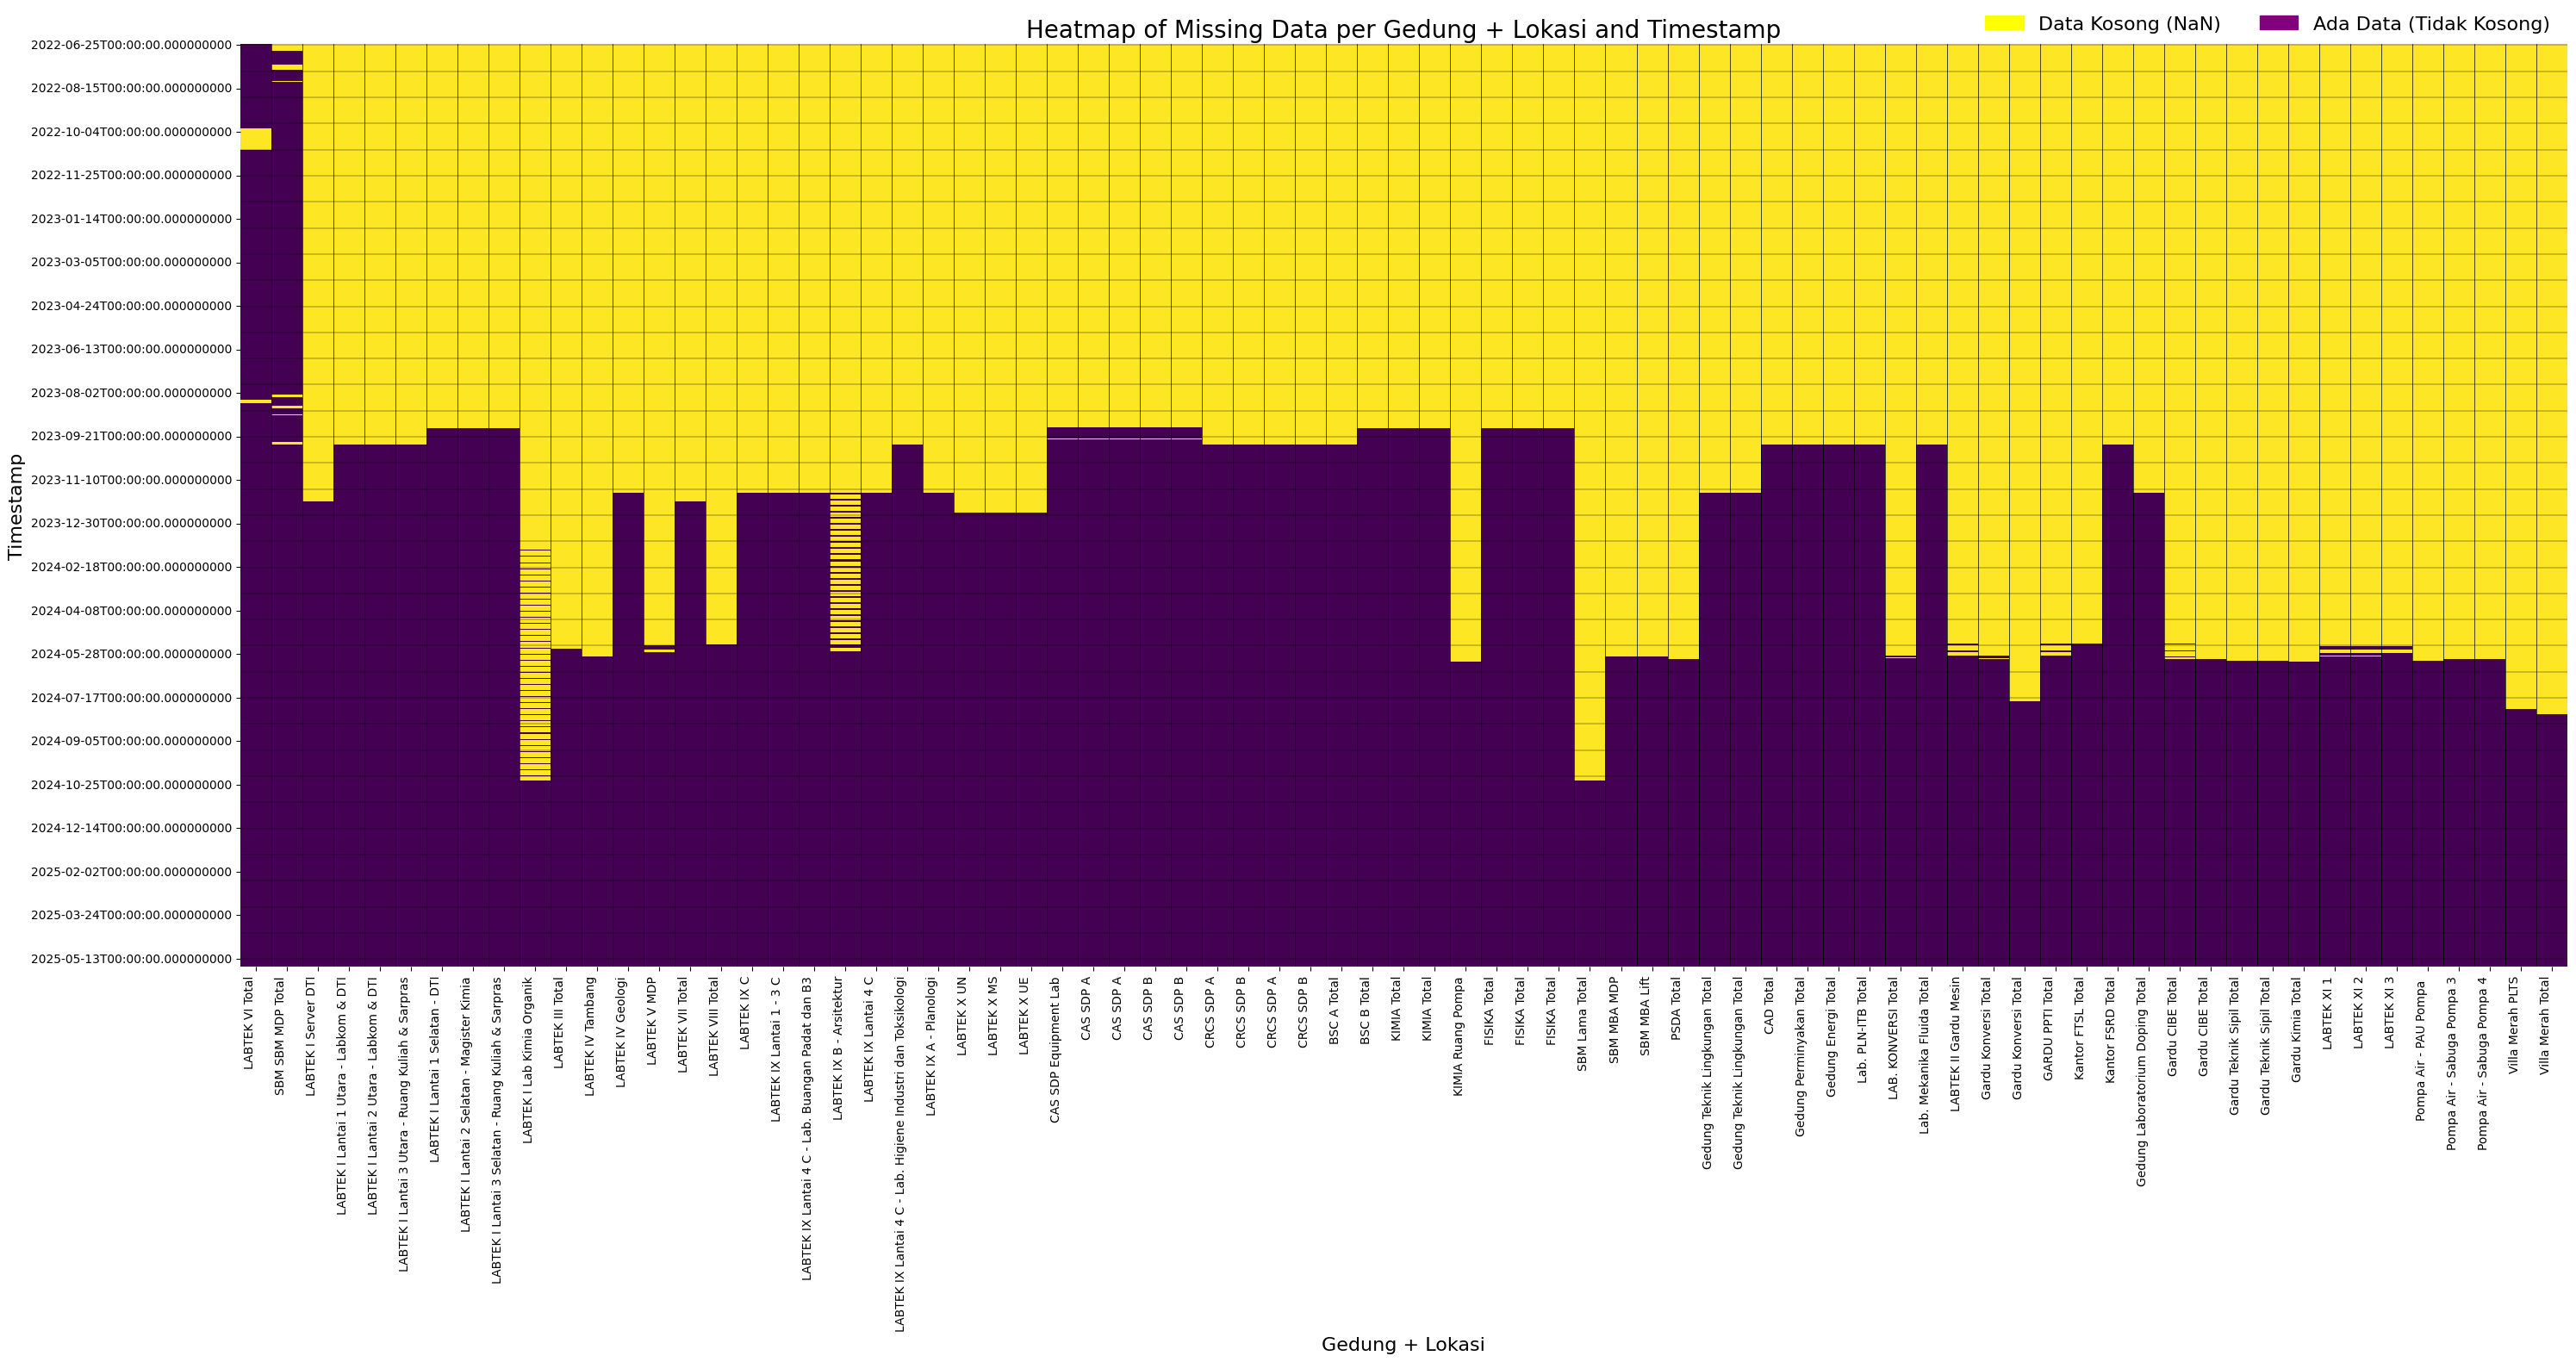

--- Analisis Missing Data Selesai ---

Analisis selesai.


In [7]:
# Visualisasi missing data pivot table
path_data_pivot_harian = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet'
path_meter_id = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet' # File info meter_id

tabel_hasil = mydef.visualisasi_missing_data_pivot_table(
    path_file_pivot=path_data_pivot_harian,
    path_file_info_meter=path_meter_id, # Menggunakan file info meter
    figsize_heatmap=(30, 16),  # Sesuaikan jika perlu
    ytick_interval=50,         # Sesuaikan jika perlu
    grid_horizontal_interval=30 # Sesuaikan jika perlu
)

if tabel_hasil is not None:
    print("\nAnalisis selesai.")

## Menghilangkan data kosong

### Mengambil data dari 1 Juni 2024 (data_4)

In [8]:
# load file
df_jam_3 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_3.parquet')
df_hari_3 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')


In [9]:
# Menentukan tanggal mulai filter
tanggal_mulai_filter = '2024-06-01'

df_hari_4 = df_hari_3.copy()
df_jam_4 = df_jam_3.copy()

# Melakukan filter
# df_harian_pivoted.index sudah bertipe DatetimeIndex
df_hari_4 = df_hari_4[df_hari_4.index >= tanggal_mulai_filter]
df_jam_4 = df_jam_4[df_jam_4.index >= tanggal_mulai_filter]

# save file ke versi 4
df_hari_4.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_4.parquet')
df_jam_4.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_4.parquet')
df_hari_4.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_4.csv')
df_jam_4.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_4.csv')

# Menampilkan informasi setelah filter
print(f"Shape data jam sebelum filter: {df_jam_3.shape}")
print(f"\nShape data jam SETELAH filter: {df_jam_4.shape}")
print(f"\nShape data hari SETELAH filter: {df_hari_4.shape}")
print(f"\nShape data hari sebelum filter: {df_hari_3.shape}")

## ternyata shape data jam dan hari jumlah kolomnya betbeda. jika mengacu pada table meter_id harusnya jumlhnya 116.

Shape data jam sebelum filter: (11606, 75)

Shape data jam SETELAH filter: (8536, 75)

Shape data hari SETELAH filter: (356, 75)

Shape data hari sebelum filter: (1060, 75)



--- Memulai Analisis Missing Data untuk File: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_4.parquet (Versi Disesuaikan) ---
File pivot berhasil dimuat sebagai Parquet.
File informasi meter berhasil dimuat dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet

Ringkasan Analisis Missing Data (beberapa baris teratas):
   meter_id  jumlah_missing    fakultas          gedung             lokasi           ip  modbus_slave  include  power_meter  persentase_missing
43   117112             142         SBM        SBM Lama              Total  10.18.65.30           112        1         2200           39.887640
9    101201             122       FMIPA        LABTEK I  Lab Kimia Organik   10.1.22.67           100        1         5350           34.269663
74   500002              66  UNIT KERJA     Villa Merah              Total   10.8.62.16             1        0         2200           18.539326
73   500001              60        PLTS     Villa Merah               PLTS  

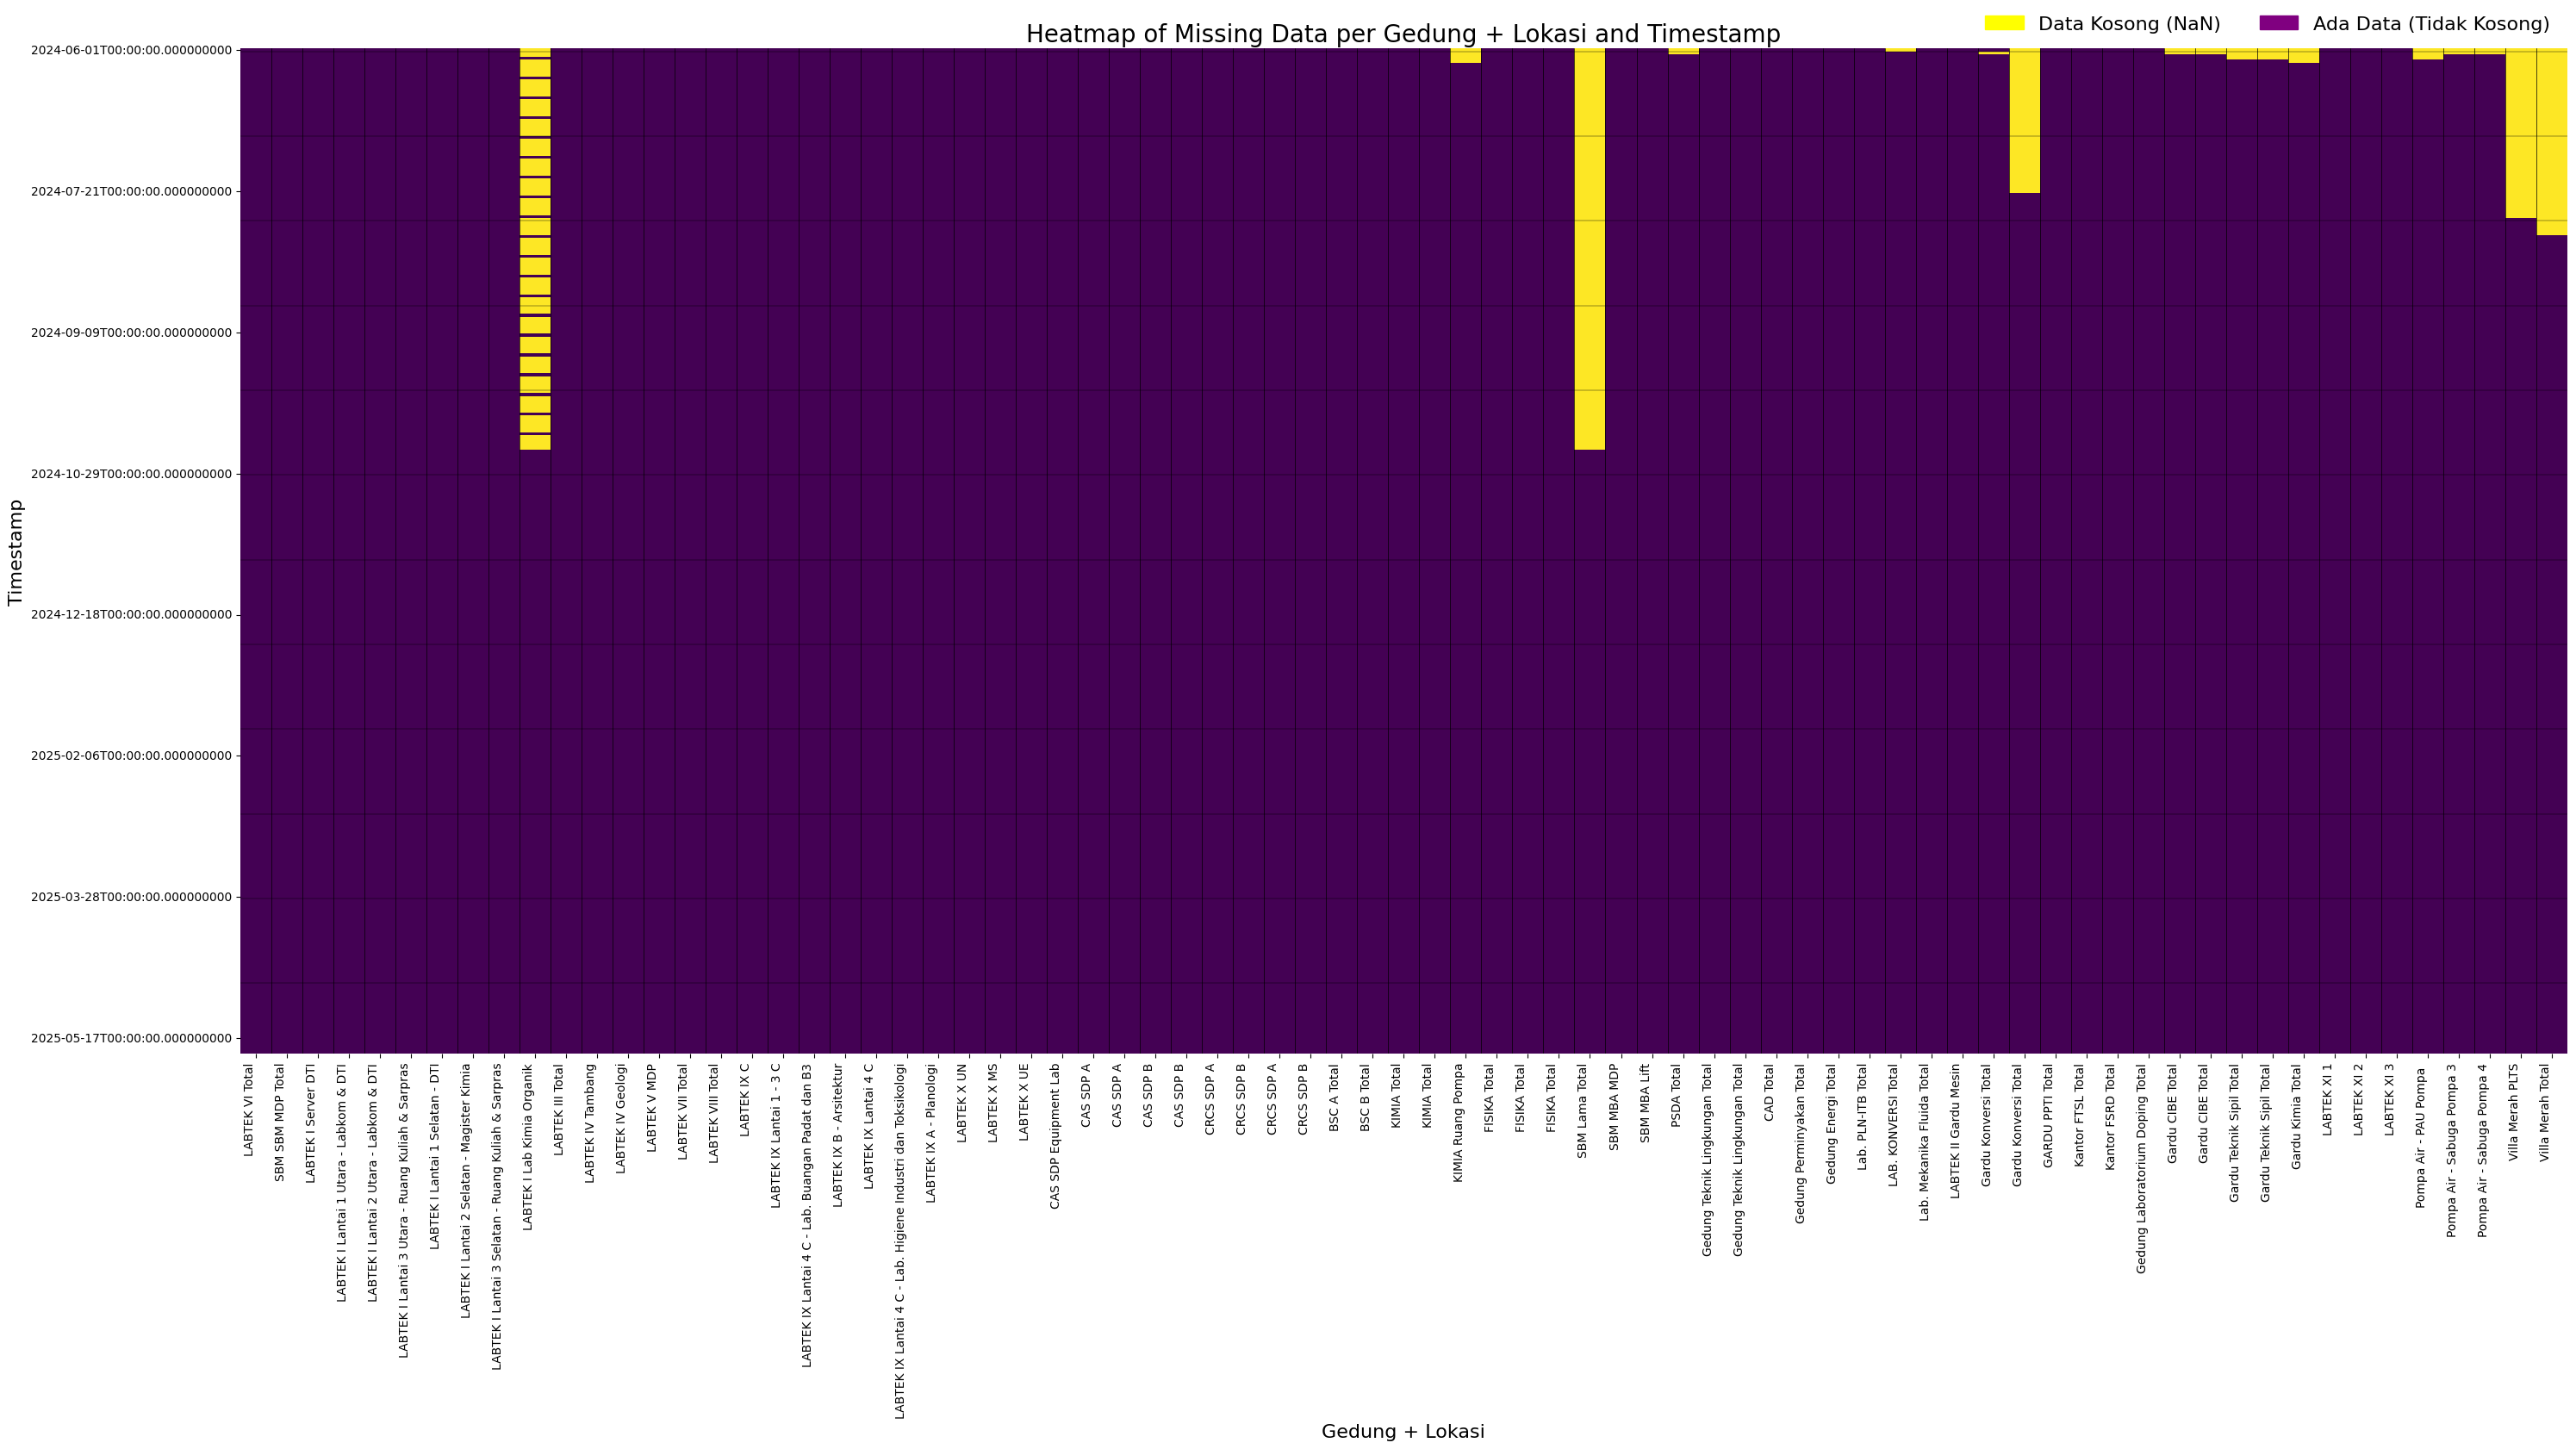

--- Analisis Missing Data Selesai ---

Analisis selesai.


In [10]:
# visualisasi missing data

path_data_pivot_harian = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_4.parquet'
path_meter_id = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet' # File info meter Bapak

tabel_hasil = mydef.visualisasi_missing_data_pivot_table(
    path_file_pivot=path_data_pivot_harian,
    path_file_info_meter=path_meter_id, # Menggunakan file info meter
    figsize_heatmap=(30, 17),  # Sesuaikan jika perlu
    ytick_interval=50,         # Sesuaikan jika perlu
    grid_horizontal_interval=30 # Sesuaikan jika perlu
)

if tabel_hasil is not None:
    print("\nAnalisis selesai.")

### Mengisi data kosong (data_5)

#### data_hari_5

In [11]:
# Panggil fungsi untuk mengisi nilai kosong dengan metode bfill dan menghapus kolom dengan nilai kosong > 10%
try:
    data_hasil_bfill_hari = mydef.process_data_with_bfill(
        file_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_4.csv',
        info_meter_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet'
    )
except Exception as e:
    print(f"Terjadi kesalahan saat menjalankan proses utama: {e}")


Memproses file data energi: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_4.csv
Index (timestamp) terdeteksi. Jumlah data waktu: 356

Jumlah kolom meter_id awal: 75
Total data kosong awal di semua meter_id: 475

Filter kolom meter_id berdasarkan >10% data kosong:
Jumlah kolom meter_id yang dihapus: 5
Jumlah kolom meter_id yang tersisa: 70
Total data kosong pada meter_id tersisa (sebelum bfill): 34

Daftar meter_id yang dihapus karena missing > 10%:
meter_id         gedung            lokasi
  130002 Gardu Konversi             Total
  101201       LABTEK I Lab Kimia Organik
  117112       SBM Lama             Total
  500001    Villa Merah              PLTS
  500002    Villa Merah             Total

Proses Backward Fill (bfill) diterapkan per kolom meter_id:
Total data kosong setelah bfill: 0
Semua data kosong pada kolom meter_id yang tersisa berhasil diisi dengan bfill.

Cuplikan 5 baris pertama dari data hasil (setelah filter dan bfill):
                   5      163   101010   

In [12]:
# Save hasil bfill ke file baru
if data_hasil_bfill_hari is not None:
    data_hasil_bfill_hari.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_5.parquet')
    data_hasil_bfill_hari.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_5.csv', index=True)
    print("Data hasil bfill disimpan ke file baru.")   

Data hasil bfill disimpan ke file baru.



--- Memulai Analisis Missing Data untuk File: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_5.parquet (Versi Disesuaikan) ---
File pivot berhasil dimuat sebagai Parquet.
File informasi meter berhasil dimuat dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet

Ringkasan Analisis Missing Data (beberapa baris teratas):
  meter_id  jumlah_missing fakultas     gedung                         lokasi             ip  modbus_slave  include  power_meter  persentase_missing
0        5               0      FTI  LABTEK VI                          Total  192.168.1.111             5        1         1200                 0.0
1      163               0      SBM        SBM                  SBM MDP Total           None             0        1            0                 0.0
2   101010               0    FMIPA   LABTEK I                     Server DTI    10.1.100.10            10        1         2200                 0.0
3   101011               0    FMIPA   LABTEK I  Lantai 1

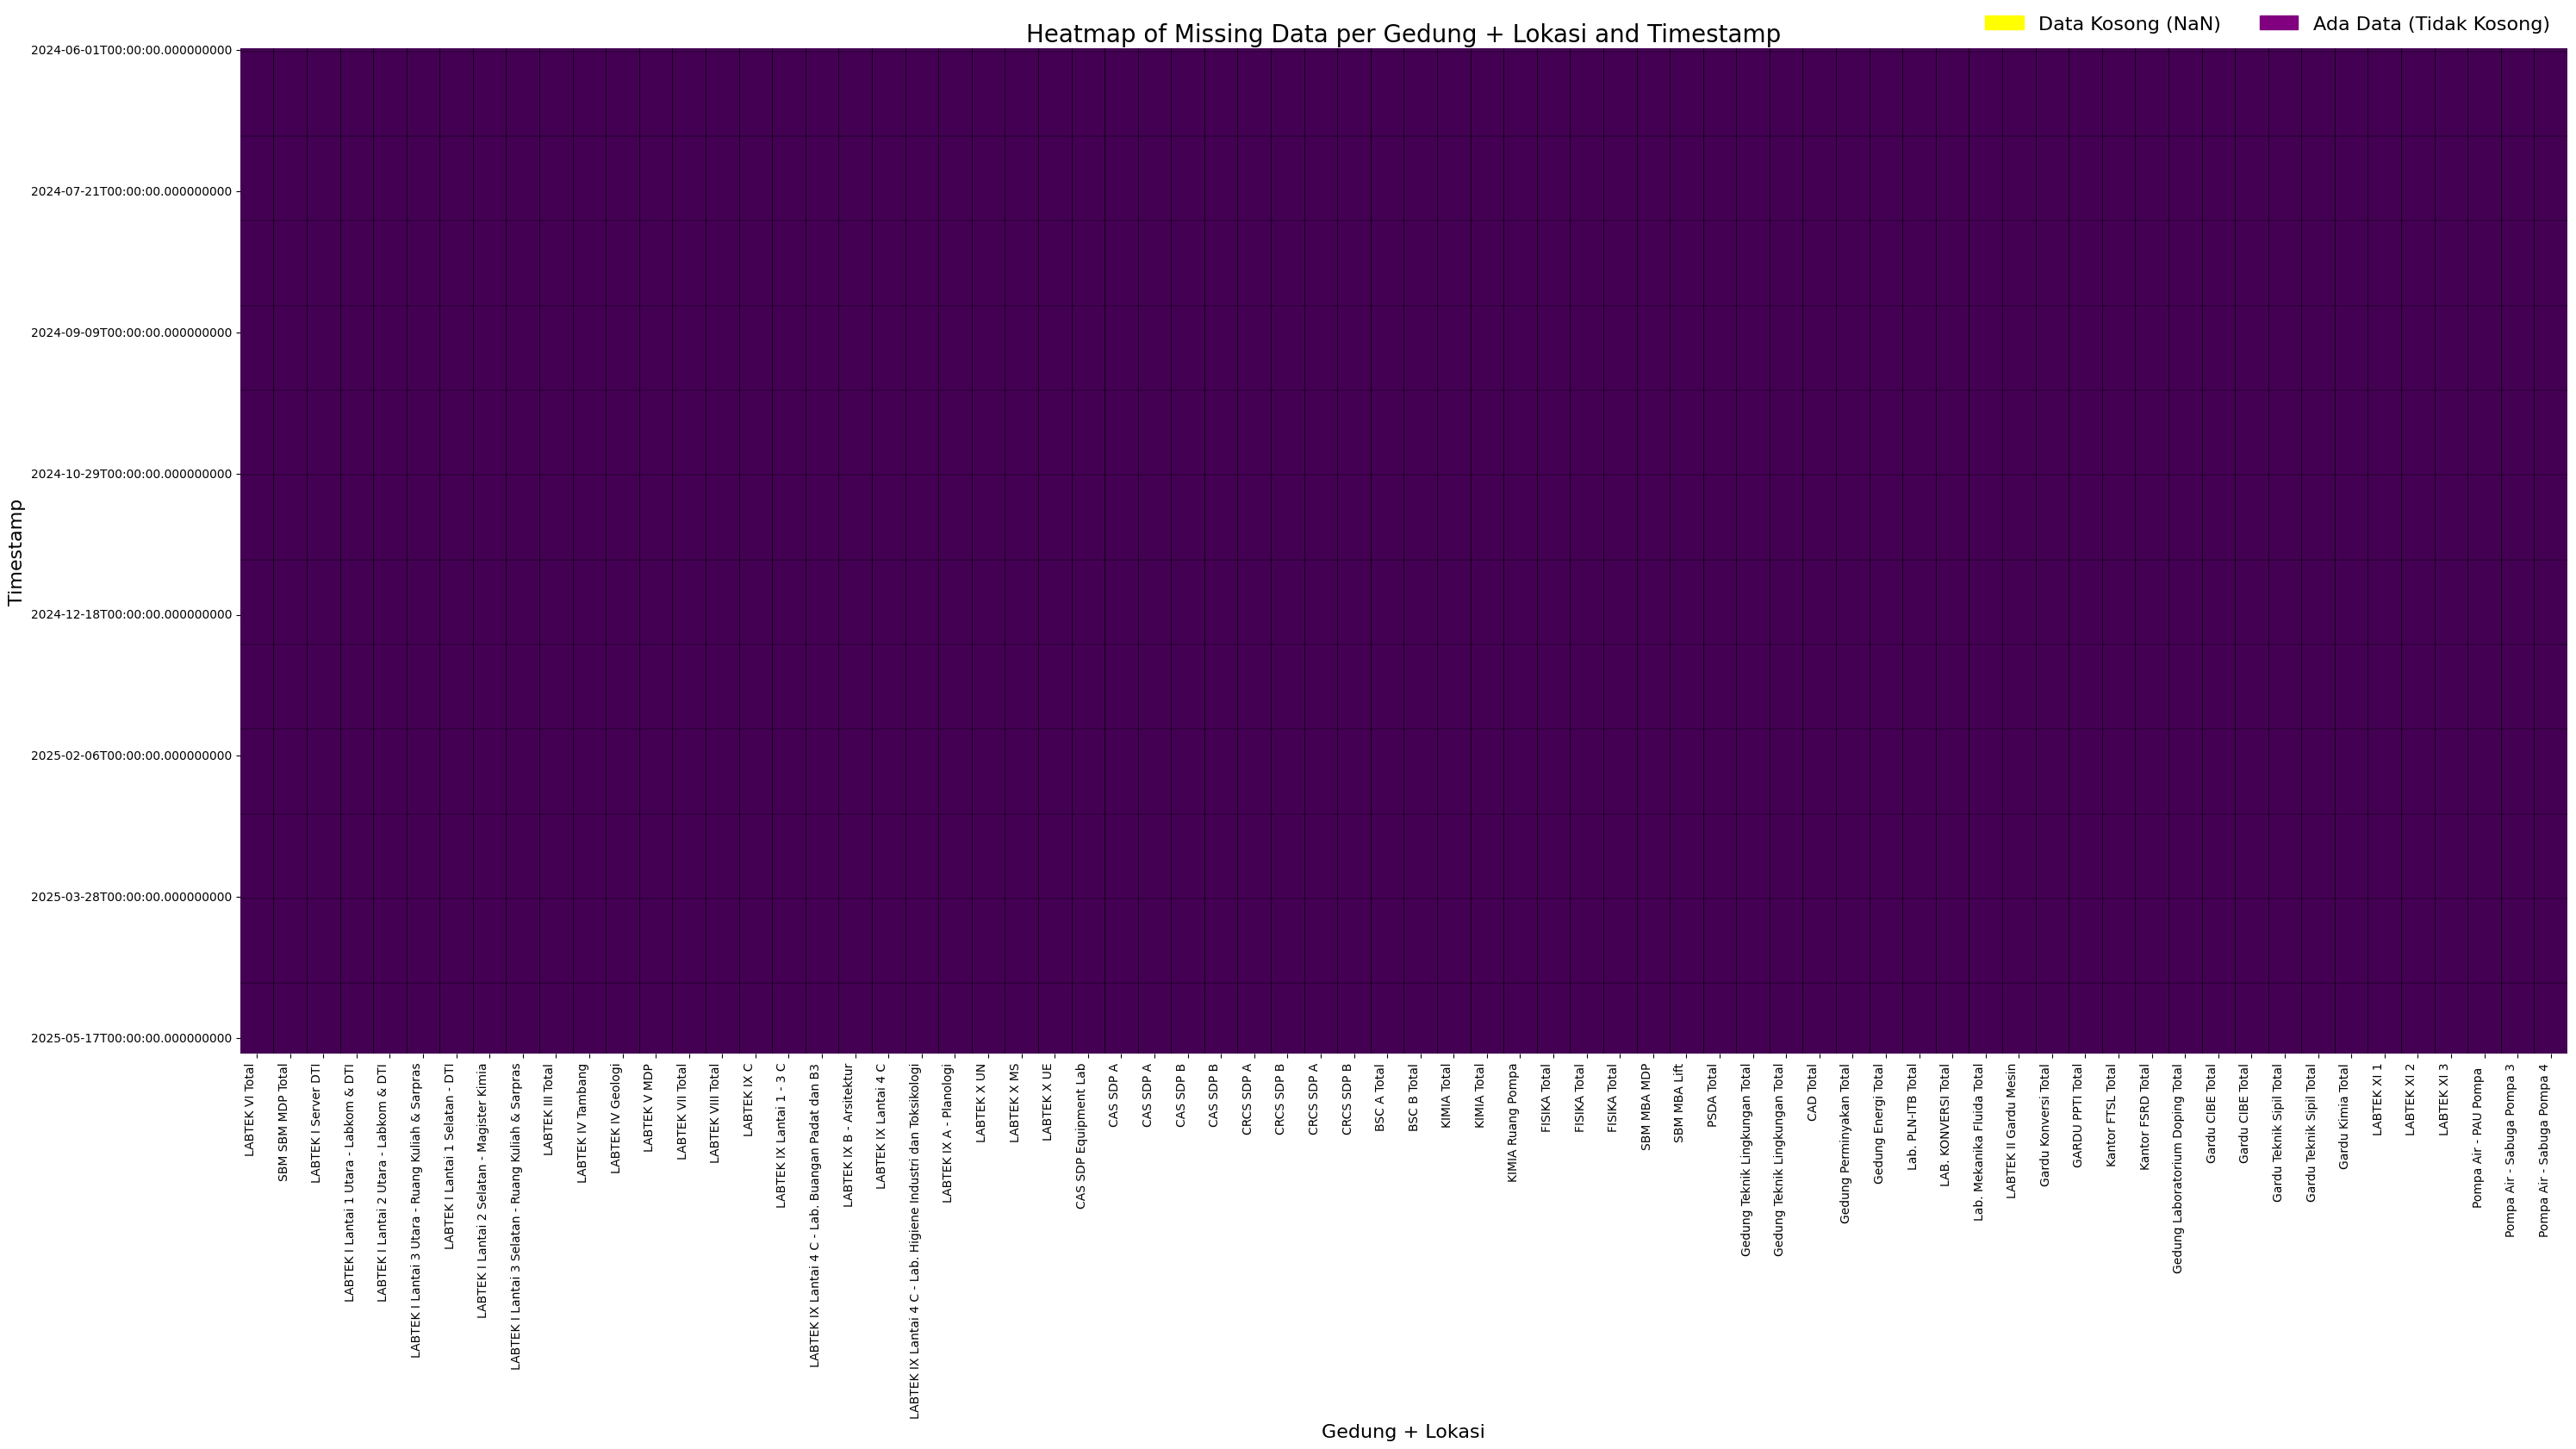

--- Analisis Missing Data Selesai ---


,meter_id,jumlah_missing,fakultas,gedung,lokasi,ip,modbus_slave,include,power_meter,persentase_missing
0,5,0,FTI,LABTEK VI,Total,192.168.1.111,5,1,1200,0.0
1,163,0,SBM,SBM,SBM MDP Total,None,0,1,0,0.0
2,101010,0,FMIPA,LABTEK I,Server DTI,10.1.100.10,10,1,2200,0.0
3,101011,0,FMIPA,LABTEK I,Lantai 1 Utara - Labkom & DTI,10.1.100.10,11,1,2200,0.0
4,101012,0,FMIPA,LABTEK I,Lantai 2 Utara - Labkom & DTI,10.1.100.10,12,1,2200,0.0
...,...,...,...,...,...,...,...,...,...,...
65,150002,0,SITH,LABTEK XI,2,167.205.38.93,2,0,2200,0.0
66,150003,0,SITH,LABTEK XI,3,167.205.38.93,3,0,2200,0.0
67,190043,0,-,Pompa Air - PAU,Pompa,10.45.10.23,43,0,2200,0.0
68,190046,0,-,Pompa Air - Sabuga,Pompa 3,10.18.205.147,46,0,2200,0.0


In [13]:
mydef.visualisasi_missing_data_pivot_table(
    path_file_pivot=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_5.parquet',
    path_file_info_meter=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet',
    figsize_heatmap=(30, 17),  # Sesuaikan jika perlu
    ytick_interval=50,         # Sesuaikan jika perlu
)

In [14]:
# Imputasi dengan metode lain ??? (gunakan data_hasil_bfill sebagai dasar)
if data_hasil_bfill_hari is not None:
    data_ffill = data_hasil_bfill_hari.ffill()
    data_mean = data_hasil_bfill_hari.fillna(data_hasil_bfill_hari.mean())
    data_interp = data_hasil_bfill_hari.interpolate(method='linear')

    # Bandingkan statistik
    print("Statistik bfill:\n", data_hasil_bfill_hari.describe())
    print("Statistik ffill:\n", data_ffill.describe())
    print("Statistik mean:\n", data_mean.describe())
    print("Statistik interpolasi:\n", data_interp.describe())
else:
    print("Data 'data_hasil_bfill' tidak tersedia atau kosong.")

Statistik bfill:
                  5          163      101010      101011      101012  \
count   356.000000   356.000000  356.000000  356.000000  356.000000   
mean    947.679643   608.158346   62.012402   24.372659   60.731382   
std     272.139028   279.263700   27.555404   13.610806   25.296759   
min     335.079000   166.873000   34.849500   11.931100   19.776400   
25%     689.398500   314.898250   46.447100   15.641050   42.504500   
50%     983.420500   669.723000   50.132400   17.461000   56.928800   
75%    1163.235000   844.872500   66.129550   29.300525   73.114075   
max    1528.330000  1231.830000  183.224000   79.471800  146.975000   

           101013      101021      101022      101023      103001  ...  \
count  356.000000  356.000000  356.000000  356.000000  356.000000  ...   
mean    31.736916   15.057360   38.761922   20.613902  593.315090  ...   
std     15.439682    7.185422   13.027565   14.269701  223.176307  ...   
min      1.489670    4.229470   13.867300    0

In [15]:
# Cek jumlah data kosong (NaN) pada setiap kolom dan total di data_hasil_bfill

if data_hasil_bfill_hari is not None:
    # Jumlah NaN per kolom
    print("Jumlah data kosong (NaN) per kolom meter_id:")
    print(data_hasil_bfill_hari.isnull().sum())

    # Total NaN di seluruh DataFrame
    total_nan = data_hasil_bfill_hari.isnull().sum().sum()
    print(f"\nTotal data kosong (NaN) di seluruh DataFrame: {total_nan}")
else:
    print("Data 'data_hasil_bfill' tidak tersedia atau kosong.")

Jumlah data kosong (NaN) per kolom meter_id:
5         0
163       0
101010    0
101011    0
101012    0
         ..
150002    0
150003    0
190043    0
190046    0
190047    0
Length: 70, dtype: int64

Total data kosong (NaN) di seluruh DataFrame: 0


#### data_jam_5

In [16]:
# Panggil fungsi untuk mengisi nilai kosong dengan metode bfill dan menghapus kolom dengan nilai kosong > 10%
try:
    data_hasil_bfill_jam = mydef.process_data_with_bfill(
        file_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_4.parquet',
        info_meter_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet'
    )
except Exception as e:
    print(f"Terjadi kesalahan saat menjalankan proses utama: {e}")

Info: File Parquet 'data_jam_4.parquet' sudah memiliki index 'timestamp'.

Memproses file data energi: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_4.parquet
Index (timestamp) terdeteksi. Jumlah data waktu: 8536

Jumlah kolom meter_id awal: 75
Total data kosong awal di semua meter_id: 12495

Filter kolom meter_id berdasarkan >10% data kosong:
Jumlah kolom meter_id yang dihapus: 5
Jumlah kolom meter_id yang tersisa: 70
Total data kosong pada meter_id tersisa (sebelum bfill): 1495

Daftar meter_id yang dihapus karena missing > 10%:
meter_id         gedung            lokasi
  130002 Gardu Konversi             Total
  101201       LABTEK I Lab Kimia Organik
  117112       SBM Lama             Total
  500001    Villa Merah              PLTS
  500002    Villa Merah             Total

Proses Backward Fill (bfill) diterapkan per kolom meter_id:
Total data kosong setelah bfill: 0
Semua data kosong pada kolom meter_id yang tersisa berhasil diisi dengan bfill.

Cuplikan 5 baris pertama

In [17]:
# Save hasil bfill ke file baru
if data_hasil_bfill_jam is not None:
    data_hasil_bfill_jam.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_5.parquet')
    data_hasil_bfill_jam.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_5.csv', index=True)
    print("Data hasil bfill disimpan ke file baru.")   

Data hasil bfill disimpan ke file baru.


## Persiapan Data

### Menjumlahkan power dari meter_id dalam satu gedung (data_6)

In [18]:
# HARI load file data_hari yang sudah diisi dengan bfill
nama_file_data_hari = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_5.csv'
nama_file_mapping_hari = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\gabung_meter_id.csv'

# Panggil fungsi utama untuk memproses data
data_hasil_akhir = mydef.gabung_konsumsi_gedung_pivot_table(nama_file_data_hari, nama_file_mapping_hari)

if data_hasil_akhir is not None:
    # Menyimpan hasil akhir ke file CSV baru
    path_hasil = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_6.parquet'
    data_hasil_akhir.to_parquet(path_hasil, index=False)
    data_hasil_akhir.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_6.csv', index=False)
    print(f"\nData yang telah diproses berhasil disimpan ke '{path_hasil}'")

Membaca file data pivot dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_5.csv
Membaca file pemetaan meter...

Berhasil membuat grup pemetaan meter:
{'CADL': [122141, 122131, 122121, 122111], 'CAS': [111100, 111110, 111120, 111130, 111140], 'CIBE': [145001, 145002], 'CRCS': [112021, 112111, 112120, 112110], 'FISIKA': [116003, 116002, 116001], 'Gardu Konversi': [130001, 130002], 'Gardu Teknik Sipil': [146002, 146001], 'Gedung Teknik Lingkungan': [121001, 121002], 'KIMIA': [149001, 115211, 115212, 115213], 'LABTEK I': [101011, 101010, 101012, 101013, 101021, 101022, 101023, 101201], 'LABTEK IX C': [109024, 109014, 109004, 109002, 109001], 'LABTEK X': [110001, 110002, 110003], 'LABTEK XI': [150003, 150002, 150001], 'Pompa Air - Sabuga': [190047, 190046], 'SBM': [118002, 118001]}

Memulai proses penggabungan kolom...
  > Menjumlahkan 5 kolom untuk grup 'CAS'...
  > Menjumlahkan 2 kolom untuk grup 'CIBE'...
  > Menjumlahkan 4 kolom untuk grup 'CRCS'...
  > Menjumlahkan 3 kolom unt

In [19]:
# JAM load file data_jam yang sudah diisi dengan bfill
nama_file_data_jam = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_5.csv'
nama_file_mapping_jam = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\gabung_meter_id.csv'

# Panggil fungsi utama untuk memproses data
data_hasil_akhir = mydef.gabung_konsumsi_gedung_pivot_table(nama_file_data_jam, nama_file_mapping_jam)

if data_hasil_akhir is not None:
    # Menyimpan hasil akhir ke file CSV baru
    path_hasil = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_6.parquet'
    data_hasil_akhir.to_parquet(path_hasil, index=False)
    data_hasil_akhir.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_6.csv', index=False)
    print(f"\nData yang telah diproses berhasil disimpan ke '{path_hasil}'")

Membaca file data pivot dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_5.csv
Membaca file pemetaan meter...

Berhasil membuat grup pemetaan meter:
{'CADL': [122141, 122131, 122121, 122111], 'CAS': [111100, 111110, 111120, 111130, 111140], 'CIBE': [145001, 145002], 'CRCS': [112021, 112111, 112120, 112110], 'FISIKA': [116003, 116002, 116001], 'Gardu Konversi': [130001, 130002], 'Gardu Teknik Sipil': [146002, 146001], 'Gedung Teknik Lingkungan': [121001, 121002], 'KIMIA': [149001, 115211, 115212, 115213], 'LABTEK I': [101011, 101010, 101012, 101013, 101021, 101022, 101023, 101201], 'LABTEK IX C': [109024, 109014, 109004, 109002, 109001], 'LABTEK X': [110001, 110002, 110003], 'LABTEK XI': [150003, 150002, 150001], 'Pompa Air - Sabuga': [190047, 190046], 'SBM': [118002, 118001]}

Memulai proses penggabungan kolom...
  > Menjumlahkan 5 kolom untuk grup 'CAS'...
  > Menjumlahkan 2 kolom untuk grup 'CIBE'...
  > Menjumlahkan 4 kolom untuk grup 'CRCS'...
  > Menjumlahkan 3 kolom untu

### Ubah nomor meter_id menjadi nama gedung (Data_7)

#### Data jam

In [20]:
# 1. Tentukan path ke file 
path_data_energi = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_6.parquet' 
path_file_pemetaan = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx'

# 2. Tentukan nama kolom yang berisi ID dan Nama Gedung di file pemetaan Anda
kolom_id_meter = 'Meter ID'
kolom_nama_gedung = 'Nama Gedung'

# 3. Panggil fungsi untuk mendapatkan DataFrame yang baru
df_jam_7 = mydef.ganti_id_ke_nama_gedung(
    data_path=path_data_energi,
    mapping_path=path_file_pemetaan,
    id_column=kolom_id_meter,
    name_column=kolom_nama_gedung
)

# 4. Periksa hasilnya
if df_jam_7 is not None:
    print("\nBerikut adalah 5 baris pertama dari data dengan nama gedung yang baru:")
    print(df_jam_7.head())

    # Anda bisa menyimpannya ke file baru jika perlu
    df_jam_7.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_7.csv', index=False)
    df_jam_7.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_7.parquet')
    print("\nData berhasil disimpan ke file baru.")
else:
    print("\nTerjadi kesalahan saat memproses data. Pastikan path dan kolom yang Anda berikan benar.")

Membaca file data: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_6.parquet
Membaca file pemetaan: C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx
Membuat kamus pemetaan...
Mengganti nama kolom...

Proses penggantian nama kolom selesai dengan sukses!

Berikut adalah 5 baris pertama dari data dengan nama gedung yang baru:
             timestamp       CAS    CIBE      CRCS    FISIKA  Gardu Konversi  \
0  2024-06-01 00:00:00  42.93474  8.1547  23.67408  16.06765         4.13130   
1  2024-06-01 01:00:00  42.54626  8.1547  24.11177  15.98977         4.13130   
2  2024-06-01 02:00:00  42.19976  8.1547  24.32198  15.50519         4.13130   
3  2024-06-01 03:00:00  42.37082  8.1547  23.01553  15.44428         4.14070   
4  2024-06-01 04:00:00  42.31300  8.1547  22.97428  15.59319         4.00471   

   Gardu Teknik Sipil  Gedung Teknik Lingkungan      KIMIA  LABTEK I  ...  \
0            13.52088                   5.12838  28.039425  6.225891  ...   
1 

#### Data hari

In [21]:
# 1. Tentukan path ke file 
path_data_energi = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_6.parquet' 
path_file_pemetaan = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx'

# 2. Tentukan nama kolom yang berisi ID dan Nama Gedung di file pemetaan Anda
kolom_id_meter = 'Meter ID'
kolom_nama_gedung = 'Nama Gedung'

# 3. Panggil fungsi untuk mendapatkan DataFrame yang baru
df_hari_7 = mydef.ganti_id_ke_nama_gedung(
    data_path=path_data_energi,
    mapping_path=path_file_pemetaan,
    id_column=kolom_id_meter,
    name_column=kolom_nama_gedung
)

# 4. Periksa hasilnya
if df_hari_7 is not None:
    print("\nBerikut adalah 5 baris pertama dari data dengan nama gedung yang baru:")
    print(df_hari_7.head())

    # Anda bisa menyimpannya ke file baru jika perlu
    
    df_hari_7.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_7.csv', index=False)
    df_hari_7.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_7.parquet', index=False)
    print("\nData berhasil disimpan ke file baru.")
else:
    print("\nTerjadi kesalahan saat memproses data. Pastikan path dan kolom yang Anda berikan benar.")

Membaca file data: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_6.parquet
Membaca file pemetaan: C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\daftar_gedung_sudah_total.xlsx
Membuat kamus pemetaan...
Mengganti nama kolom...

Proses penggantian nama kolom selesai dengan sukses!

Berikut adalah 5 baris pertama dari data dengan nama gedung yang baru:
    timestamp        CAS      CIBE       CRCS    FISIKA  Gardu Konversi  \
0  2024-06-01  1024.2750   24.1129   761.2670  396.7913         44.6276   
1  2024-06-02  1012.3752   24.1129   677.7551  354.1504         12.3160   
2  2024-06-03  1382.1854   24.1129  1233.3660  557.7196         12.3160   
3  2024-06-04  1335.7590  359.8717  1127.2560  538.1849        123.2320   
4  2024-06-05  1306.5554  339.2103  1206.1100  594.2496        112.8510   

   Gardu Teknik Sipil  Gedung Teknik Lingkungan     KIMIA   LABTEK I  ...  \
0              80.065                  144.4292  607.8606  145.32672  ...   
1              80.065          

### Cek kondisi data konsumsi listrik

In [22]:
# Rankungkan konsumsi energi gedung
# ----- 1. Pastikan path file ini sudah benar -----
file_path = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_7.csv' 
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

# ----- 2. Kode untuk menghitung statistik (tidak perlu diubah) -----
stats = df.describe().T
total_consumption = df.sum()
stats['sum'] = total_consumption

stats_to_show = stats[['mean', 'std', 'min', 'max', 'sum']].copy()
stats_to_show.columns = [
    'Rata-rata per Jam (kWh)', 
    'Stdev', 
    'Min jam (kWh)', 
    'Max jam (kWh)', 
    'Total Seluruh Data (kWh)'
]

stats_to_show = stats_to_show.sort_values(by='Total Seluruh Data (kWh)', ascending=False)


# ----- 3. Baris ini akan menyimpan hasilnya ke file Excel -----
# File Excel akan disimpan di folder yang sama dengan script ini
output_file_name = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\Rangkuman_Konsumsi_Energi_Gedung.xlsx'
stats_to_show.to_excel(output_file_name, float_format="%.2f")


# ----- 4. Cetak konfirmasi (opsional) -----
print(f"Berhasil! Hasil analisis telah disimpan ke dalam file: '{output_file_name}'")
print("\nBerikut adalah pratinjau hasilnya:")
print(stats_to_show.to_string(float_format="%.2f"))

Berhasil! Hasil analisis telah disimpan ke dalam file: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\meter_id\Rangkuman_Konsumsi_Energi_Gedung.xlsx'

Berikut adalah pratinjau hasilnya:
                            Rata-rata per Jam (kWh)  Stdev  Min jam (kWh)  Max jam (kWh)  Total Seluruh Data (kWh)
LABTEK X                                      88.56  56.64          30.88         335.42                 755908.28
GARDU PPTI                                    57.24  25.30          22.48         130.40                 488598.15
CAS                                           52.77  16.60          19.26         119.68                 450405.28
LABTEK II                                     51.22  20.89          16.40         132.70                 437171.71
LABTEK VIII                                   43.11  19.96          16.58         121.15                 367996.15
LABTEK IX C                                   41.57  30.19           9.57         142.39                 354846.53
CRCS            

In [23]:
# ----- Kode untuk Membaca Data Harian -----
# Pastikan path ini menunjuk ke file data harian Anda
file_path = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_7.csv' 
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

# ----- Kode untuk Menghitung Statistik -----
stats = df.describe().T
total_consumption = df.sum()
stats['sum'] = total_consumption

stats_to_show = stats[['mean', 'std', 'min', 'max', 'sum']].copy()

# --- PENYESUAIAN LABEL UNTUK DATA HARIAN ---
stats_to_show.columns = [
    'Rata-rata Harian (kWh)',      # Ini adalah rata-rata konsumsi harian selama periode data
    'Stdev',                      # Standar deviasi dari konsumsi harian
    'Min Data Harian (kWh)',           # Hari dengan konsumsi terendah
    'Max Data Harian (kWh)',           # Hari dengan konsumsi tertinggi (puncak)
    'Total Data Seluruh Periode (kWh)'  # Total konsumsi selama seluruh periode (misal: bulanan)
]
# -----------------------------------------

# Mengurutkan berdasarkan total konsumsi selama periode tersebut
stats_to_show = stats_to_show.sort_values(by='Total Data Seluruh Periode (kWh)', ascending=False)

# ----- Cetak Hasil -----
# --- PENYESUAIAN JUDUL ---
print("Ringkasan Statistik Konsumsi Energi Harian per Gedung")
print("(Diurutkan dari total konsumsi tertinggi ke terendah)")
print(stats_to_show.to_string(float_format="%.2f"))

Ringkasan Statistik Konsumsi Energi Harian per Gedung
(Diurutkan dari total konsumsi tertinggi ke terendah)
                            Rata-rata Harian (kWh)  Stdev  Min Data Harian (kWh)  Max Data Harian (kWh)  Total Data Seluruh Periode (kWh)
LABTEK X                                   2123.29 673.03                 852.54                3573.61                         755890.33
GARDU PPTI                                 1368.37 349.74                 620.12                2168.98                         487138.19
CAS                                        1265.17 239.33                 539.62                1766.96                         450398.87
LABTEK II                                  1227.54 282.10                 498.88                1796.11                         437005.52
LABTEK VIII                                1033.73 242.53                 443.54                1512.07                         368009.53
LABTEK IX C                                 996.80 360.64       

## Data suhu

In [24]:
# Meringkas data suhu per menit menjadi per jam dengan rata-rata
path_file_input_suhu = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet' 
path_file_output_suhu = r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet'
# Contoh: path_file_output_suhu = r'D:\Dataset\Suhu\hasil\data_suhu_juli_per_jam.parquet'

print(f"Memproses file: {path_file_input_suhu}")
# Memanggil fungsi dengan menyertakan path output
hasil_data_per_jam = mydef.proses_data_suhu_ringkas(path_file_input_suhu, path_file_output_suhu) 

if hasil_data_per_jam is not None:
    print("\nProses selesai.")
    # Pesan penyimpanan sekarang akan muncul dari dalam fungsi jika path_output diberikan
else:
    print("\nProses gagal atau tidak menghasilkan data.")

Memproses file: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet

Data suhu per jam (rata-rata jam sebelumnya):
                     avg_temp_previous_hour
stationDateTime                            
2022-07-04 12:00:00               29.023810
2022-07-04 13:00:00               29.670000
2022-07-04 14:00:00               29.355000
2022-07-04 15:00:00               28.686667
2022-07-04 16:00:00               27.683333
2022-07-04 17:00:00               26.775000
2022-07-04 18:00:00               25.380000
2022-07-04 19:00:00               24.393333
2022-07-04 20:00:00               23.525000
2022-07-04 21:00:00               22.796667
Hasil disimpan ke: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet dan C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.csv

Hasil berhasil disimpan ke: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet

Proses selesai.



--- Memulai Visualisasi Titik dari: C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam.csv ---
Data berhasil dibaca dan diproses.
Plot berhasil disimpan di: C:\MyFolder\Git\TA_SpatioTemporal\Gambar\plot_suhu_per_jam.png
Menampilkan plot...


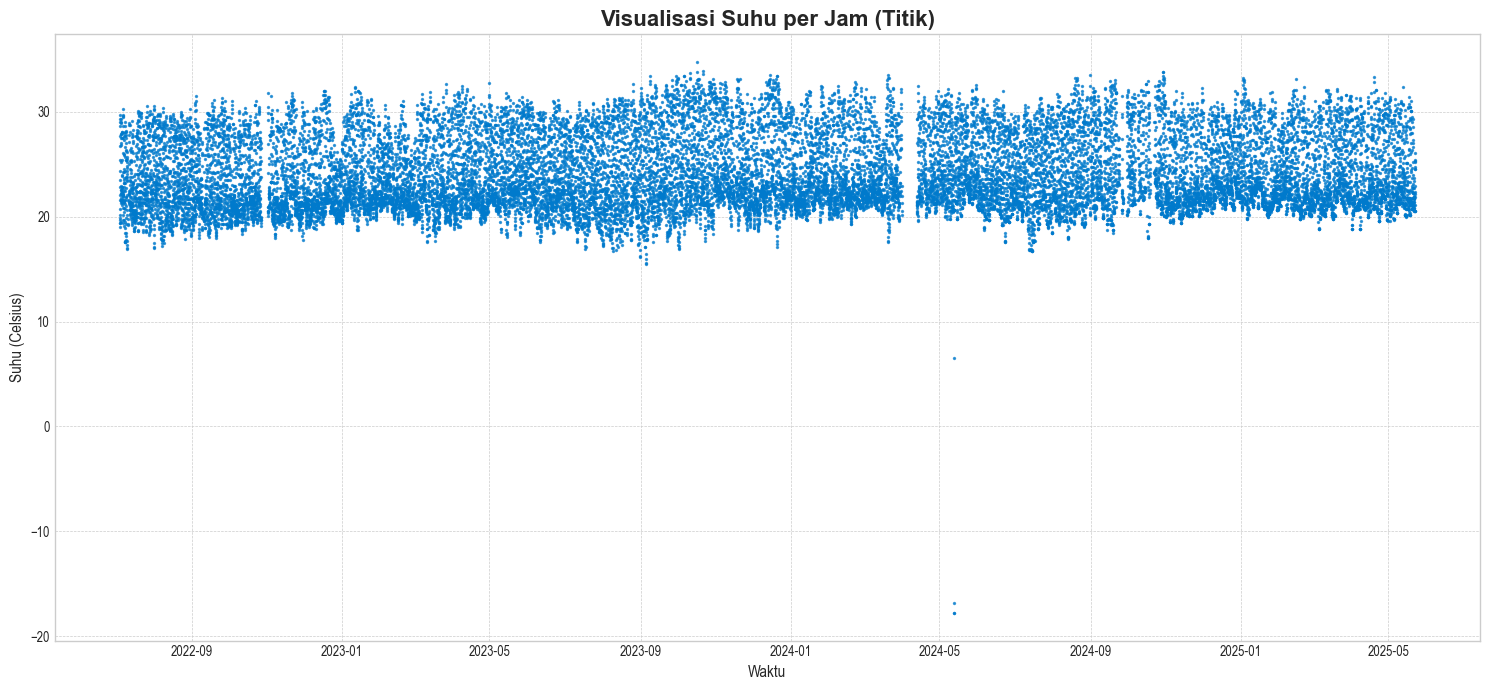

--- Proses Visualisasi Titik Selesai ---


In [25]:
# Visualisasi data suhu per jam
mydef.plot_suhu_perjam_titik(
    file_path=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam.csv',
    path_output_gambar=r'C:\MyFolder\Git\TA_SpatioTemporal\Gambar\plot_suhu_per_jam.png',
   )

In [26]:
# rangkuman data suhu yang hilang per bulan
mydef.rangkum_missing_data_per_bulan(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet')


--- Memulai Rangkuman Data Kosong per Bulan untuk: C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet ---
Data berhasil dibaca.
'stationDateTime' tidak ditemukan di kolom. Mengecek apakah ia adalah index...
Benar, kolom waktu sudah menjadi index. Melanjutkan proses.
Pra-pemrosesan data selesai.
Me-resample data ke frekuensi 'h'...
Merangkum hasil per bulan...
--- Rangkuman Selesai ---


,Jumlah Titik Diharapkan,Jumlah Titik Kosong,Jumlah Titik Ada,Persentase Kosong (%)
stationDateTime,,,,
2022-07,660,23,637,3.48
2022-08,744,0,744,0.00
2022-09,720,23,697,3.19
2022-10,744,108,636,14.52
2022-11,720,25,695,3.47
2022-12,744,0,744,0.00
2023-01,744,23,721,3.09
2023-02,672,0,672,0.00
2023-03,744,23,721,3.09


In [27]:
# =======================================================================
# SEL 1: MEMPROSES DATA
# Tujuan: Membaca file Parquet asli, membersihkan, mengisi nilai kosong,
#         dan menyimpan hasilnya ke file CSV dan Parquet baru.
# =======================================================================

print("Memulai proses pengolahan data suhu...")

# Panggil fungsi dari file mydef.py untuk mengolah data
# df_hasil_lengkap akan berisi data yang sudah diolah dan kolom 'year', 'month'
df_hasil_lengkap = mydef.olah_data_suhu(
    file_input=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet',
    file_output_csv=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam_2_lengkap.csv',
    file_output_parquet=r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam_2_lengkap.parquet',
    nama_kolom_timestamp='stationDateTime',
    nama_kolom_suhu='avg_temp_previous_hour'
)

if df_hasil_lengkap is not None:
    print("\nProses pengolahan data berhasil diselesaikan.")
    print(f"Data hasil olah memiliki {len(df_hasil_lengkap)} baris.")
else:
    print("\nProses pengolahan data GAGAL. Periksa pesan error di atas.")



Memulai proses pengolahan data suhu...
Mulai proses pengolahan data suhu dari file: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet'
Data bersih berhasil disimpan ke file CSV: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu_perjam_2_lengkap.csv'
Data bersih berhasil disimpan ke file Parquet: 'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam_2_lengkap.parquet'

Proses pengolahan data berhasil diselesaikan.
Data hasil olah memiliki 25280 baris.


c:\MyFolder\Git\TA_SpatioTemporal\Code\mydef.py:967: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_complete[nama_kolom_suhu].interpolate(method='linear', limit_direction='both', inplace=True)



Memulai proses visualisasi...


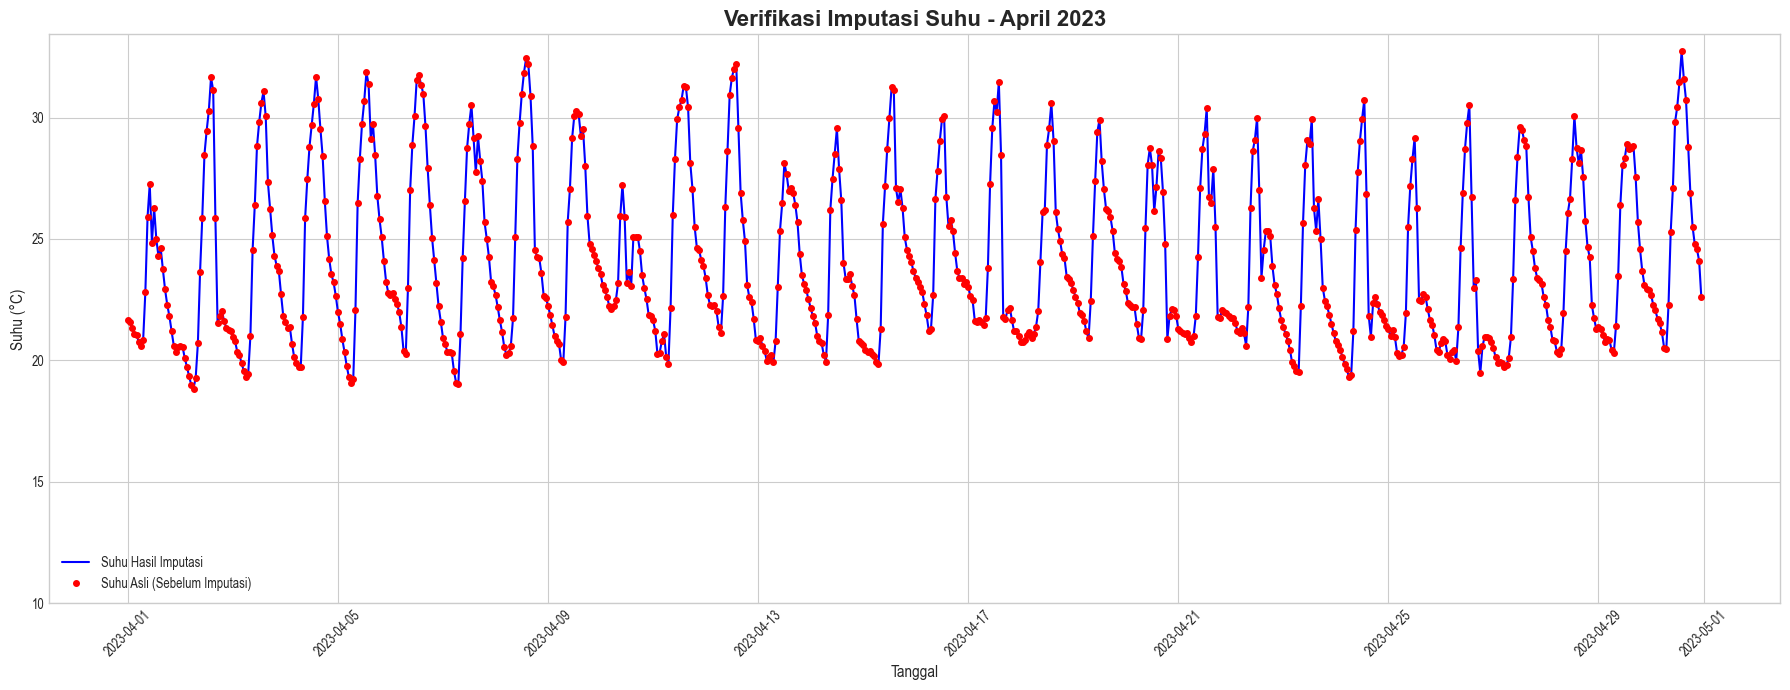

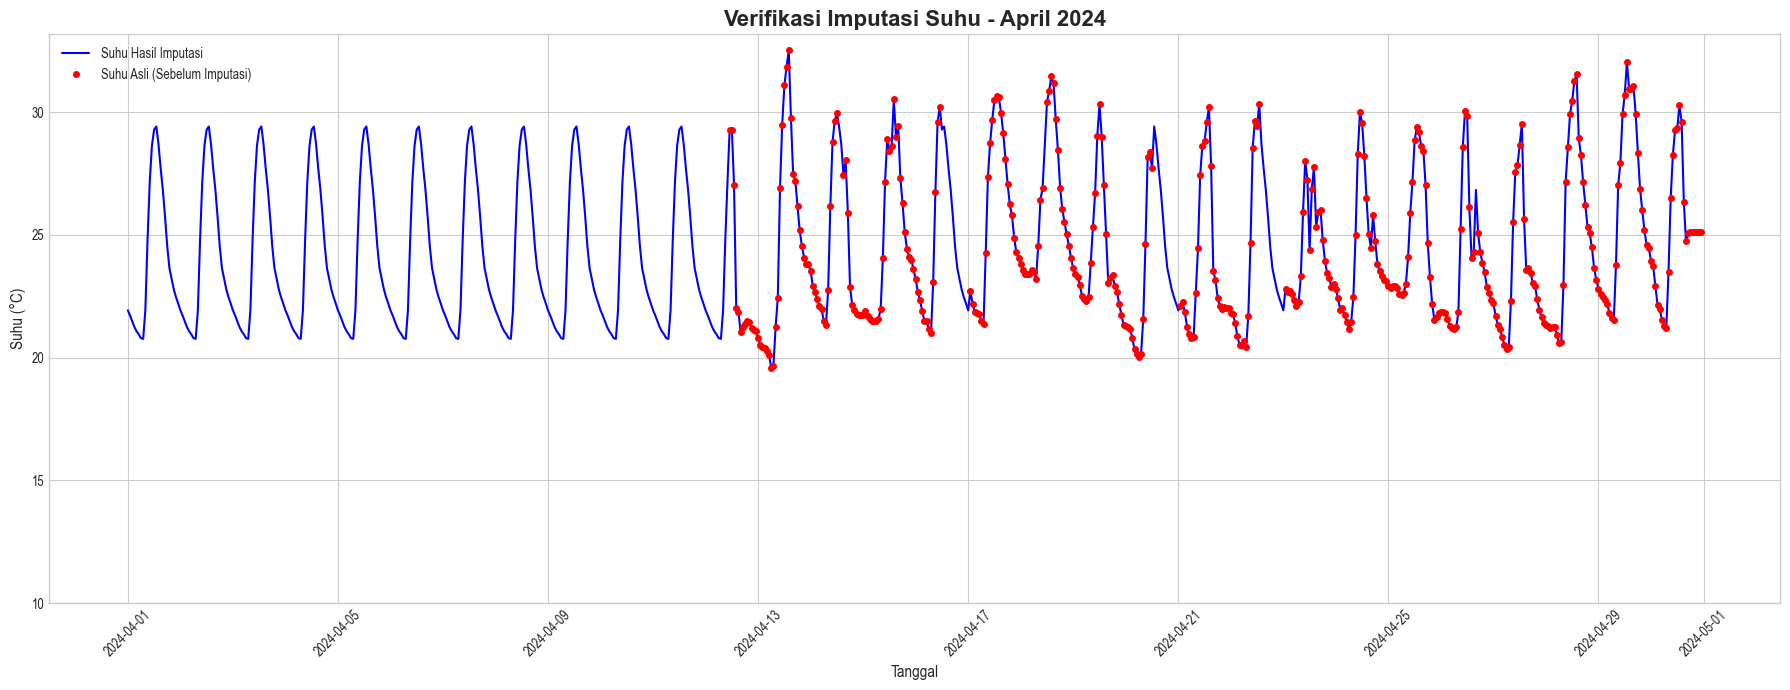

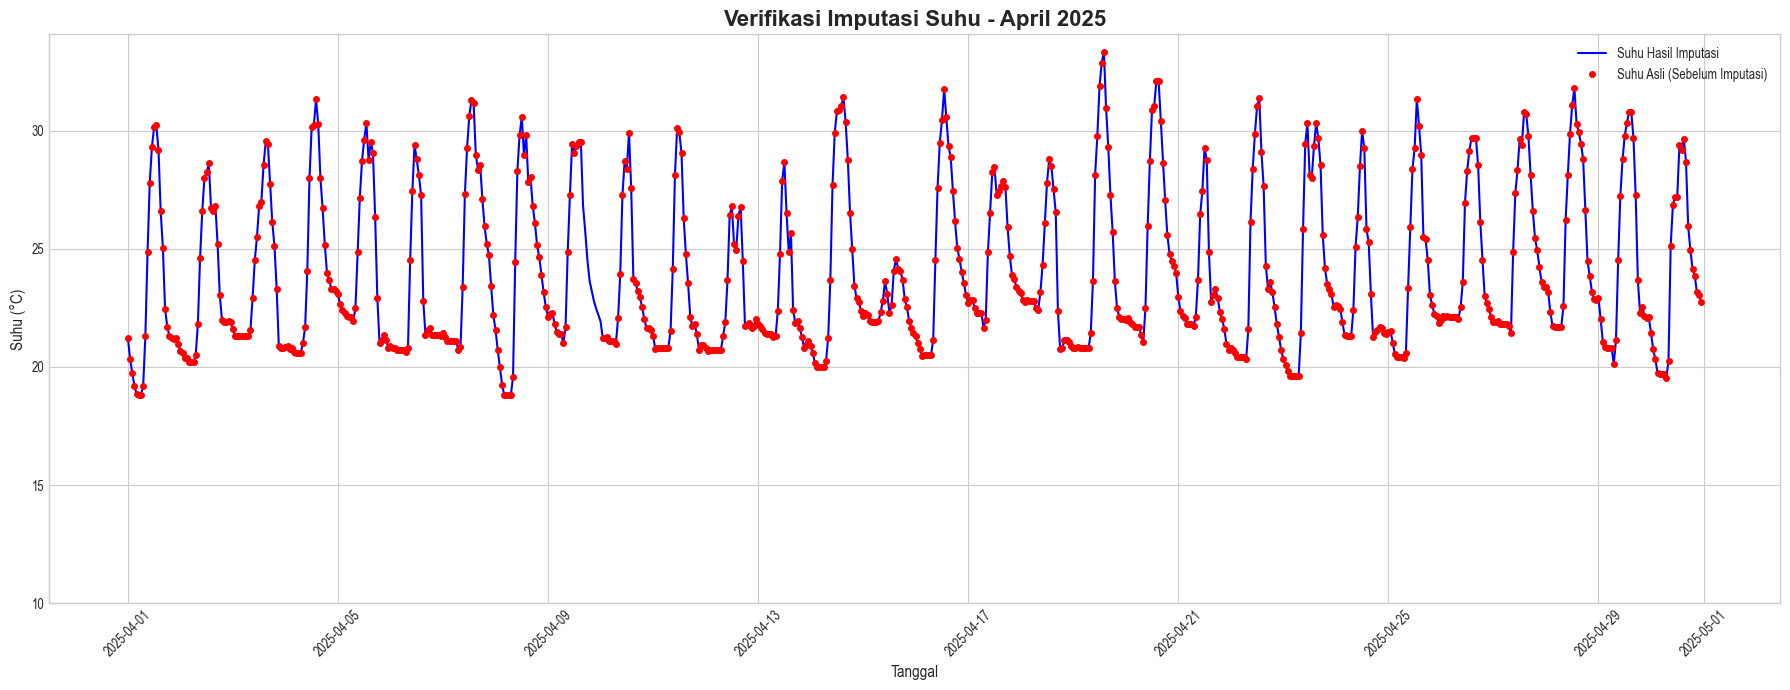

In [28]:
# =======================================================================
# SEL 2: VISUALISASI HASIL
# Tujuan: Menampilkan perbandingan antara data asli (sebelum diolah)
#         dengan data yang sudah diisi (hasil imputasi) dalam bentuk grafik.
# =======================================================================

# Pastikan sel pertama sudah dijalankan dan berhasil
if 'df_hasil_lengkap' in locals() and df_hasil_lengkap is not None:
    print("\nMemulai proses visualisasi...")
    
    # Untuk perbandingan, muat kembali data ASLI (sebelum diolah)
    df_asli = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu_perjam.parquet')
    
    # --- PERBAIKAN: Cek dan pastikan kolom timestamp ada ---
    # Jika 'stationDateTime' tidak ada sebagai kolom, kemungkinan ia adalah index.
    if 'stationDateTime' not in df_asli.columns:
        df_asli.reset_index(inplace=True) # Ubah index menjadi kolom
    
    # Setelah reset, jika kolom baru bernama 'index', ganti namanya
    if 'index' in df_asli.columns and 'stationDateTime' not in df_asli.columns:
        df_asli.rename(columns={'index': 'stationDateTime'}, inplace=True)
    # --- Akhir Perbaikan ---

    # Panggil fungsi visualisasi dari mydef.py
    # Ganti nilai 'plot_month' sesuai kebutuhan:
    # -> Gunakan 'all' untuk menampilkan grafik semua bulan.
    # -> Gunakan angka bulan (misal: 1 untuk Januari, 7 untuk Juli) untuk bulan spesifik.
    mydef.visualisasi_imputasi_suhu(
        df_complete=df_hasil_lengkap, 
        df_original=df_asli,
        nama_kolom_timestamp='stationDateTime',
        nama_kolom_suhu='avg_temp_previous_hour',
        plot_month=4  # <-- UBAH DI SINI (misal: "7" untuk bulan Juli, atau "all" untuk semua bulan)
    )
else:
    print("Variabel 'df_hasil_lengkap' tidak ditemukan atau kosong. Jalankan sel pertama terlebih dahulu.")


In [29]:
import pandas as pd

cobashape = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_7.csv')
cobashape.shape

cobashape2 = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_7.csv')
cobashape2.shape

(8536, 40)

# Modelling

## Unification Data Konsumsi dan Suhu

In [30]:
# Unification Data Konsumsi dan Suhu JAM
import pandas as pd

# Baca file data energi Anda dari format Parquet.
df_lebar = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_7.parquet')

# --- Logika untuk Menangani Timestamp dari File Parquet ---
# File Parquet sering menyimpan kolom waktu sebagai 'index'.
# Langkah pertama adalah mengubah index tersebut menjadi kolom biasa.
df_lebar.reset_index(inplace=True)

# Setelah reset_index, ada dua kemungkinan:
# 1. Kolom waktu asli bernama 'timestamp' dan index menjadi kolom 'index'.
# 2. Kolom waktu asli tidak bernama (menjadi 'index') dan tidak ada kolom 'timestamp'.
# Logika di bawah ini menangani kedua kasus untuk mencegah duplikasi nama kolom.

if 'timestamp' in df_lebar.columns and 'index' in df_lebar.columns:
    # Kasus 1: Hapus kolom 'index' yang tidak diperlukan.
    print("Mendeteksi kolom 'timestamp' dan 'index'. Menggunakan 'timestamp' yang sudah ada.")
    df_lebar.drop(columns=['index'], inplace=True)
elif 'index' in df_lebar.columns:
    # Kasus 2: Ganti nama kolom 'index' menjadi 'timestamp'.
    print("Mengganti nama kolom 'index' menjadi 'timestamp'.")
    df_lebar.rename(columns={'index': 'timestamp'}, inplace=True)
elif 'timestamp' not in df_lebar.columns:
    # Jika tidak ada kolom 'timestamp' atau 'index', berikan error.
    raise ValueError("Tidak ditemukan kolom 'timestamp' atau 'index' untuk digunakan sebagai penanda waktu.")

# Lakukan proses "unpivot" atau "melt"
df_panjang = pd.melt(df_lebar, 
                     id_vars=['timestamp'],       # Kolom yang dipertahankan
                     var_name='meter_id',         # Nama kolom baru untuk nama gedung
                     value_name='konsumsi_energi' # Nama kolom baru untuk nilai energi
                    )

# Simpan hasilnya ke format Parquet (utama)
df_panjang.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_long_8_format.parquet', index=False)
# Simpan juga hasilnya ke format CSV (untuk cadangan/backup)
df_panjang.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_8_long_format.csv', index=False)

print("\nProses unpivot selesai. Data energi kini dalam format panjang.")
print("Hasil disimpan dalam format Parquet dan CSV.")
print("Contoh hasilnya:")
print(df_panjang.head())


Mendeteksi kolom 'timestamp' dan 'index'. Menggunakan 'timestamp' yang sudah ada.

Proses unpivot selesai. Data energi kini dalam format panjang.
Hasil disimpan dalam format Parquet dan CSV.
Contoh hasilnya:
             timestamp meter_id  konsumsi_energi
0  2024-06-01 00:00:00      CAS         42.93474
1  2024-06-01 01:00:00      CAS         42.54626
2  2024-06-01 02:00:00      CAS         42.19976
3  2024-06-01 03:00:00      CAS         42.37082
4  2024-06-01 04:00:00      CAS         42.31300
